In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
os.chdir('/content')
dataset_slug = "hijest/genre-classification-dataset-imdb"
!kaggle datasets download -d $dataset_slug
!unzip -q {dataset_slug.split('/')[1]}.zip -d genre_classification_dataset

print("Dataset downloaded and unzipped successfully.")


 60% 25.0M/41.7M [00:00<00:00, 98.9MB/s]
100% 41.7M/41.7M [00:00<00:00, 120MB/s] 
Dataset downloaded and unzipped successfully.


#  Importing Librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
import io

# Data set of train_data.txt file

In [ ]:

train = pd.read_csv("/content/genre_classification_dataset/Genre Classification Dataset/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python').reset_index(drop=True)

train.head(30)


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,Spirits (2014/I),horror,Four high school students embark on a terrify...


# Data cleaning using TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
x_train = tfidf_vectorizer.fit_transform(train['Description'])
y_train = train['Genre']

# Training Data using Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


# Loading test_data.txt

In [ ]:
test_data = pd.read_csv('/content/genre_classification_dataset/Genre Classification Dataset/test_data.txt', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'MOVIE_PLOT'], engine='python')


# Training Evaluation Metrics

In [ ]:
x_test = test_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())
x_test_tfidf = tfidf_vectorizer.transform(x_test)
y_train_pred = dt_model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='micro')
recall_train = recall_score(y_train, y_train_pred, average='micro')
f1_train = f1_score(y_train, y_train_pred, average='micro')
print(f"Accuracy: {accuracy_train * 100:.2f}%")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-score: {f1_train:.2f}")

Accuracy: 99.95%
Precision: 1.00
Recall: 1.00
F1-score: 1.00


# Final Prediction of the Genres

In [ ]:
x_test = test_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())
x_test_tfidf = tfidf_vectorizer.transform(x_test)
y_test_pred = dt_model.predict(x_test_tfidf)
predicted_genres = y_test_pred
test_movie_names = test_data['MOVIE_NAME']
test_results = pd.DataFrame({'MOVIE_NAME': test_movie_names, 'PREDICTED_GENRES': predicted_genres})
print(test_results.head(30))

                                      MOVIE_NAME PREDICTED_GENRES
0                          Edgar's Lunch (1998)           comedy 
1                      La guerra de papá (1977)            drama 
2                   Off the Beaten Track (2010)      documentary 
3                        Meu Amigo Hindu (2015)            drama 
4                             Er nu zhai (1955)            drama 
5                            Riddle Room (2016)            drama 
6                                L'amica (1969)           horror 
7                          Ina Mina Dika (1989)           comedy 
8    Equinox Special: Britain's Tornados (2005)      documentary 
9                                  Press (2011)            drama 
10                          The Firm Man (1975)         thriller 
11                         Out of Here (2013/I)           comedy 
12                                 Tip 2 (1990)      documentary 
13                       Hero of the Day (2012)      documentary 
14        

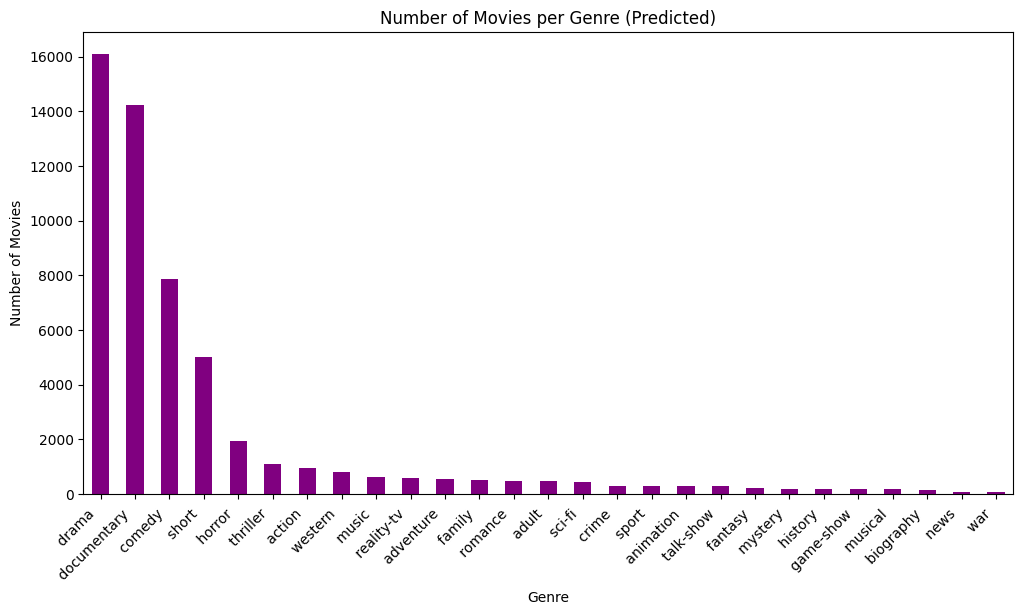

In [ ]:
genre_counts = test_results['PREDICTED_GENRES'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title('Number of Movies per Genre (Predicted)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Comparing with the solution

In [ ]:
test_solution = pd.read_csv("/content/genre_classification_dataset/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python').reset_index(drop=True)
test_solution.head(10)

,Title,Genre,Description
0,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),drama,Before he was known internationally as a mart...
5,Riddle Room (2016),horror,Emily Burns is being held captive in a room w...
6,L'amica (1969),drama,The beautiful but neglected wife of a brillia...
7,Ina Mina Dika (1989),comedy,Vasu Inamdar (Ina) suffers from a disorder wh...
8,Equinox Special: Britain's Tornados (2005),documentary,An insight into the tornados that hit Kensal ...
9,Press (2011),drama,Press is a story of young people overwhelmed ...


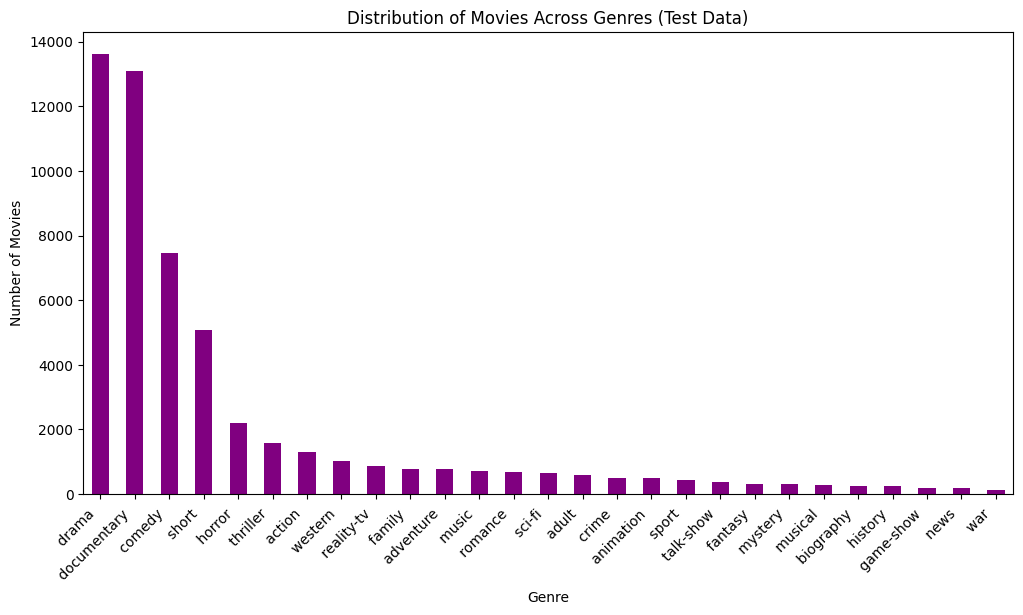

In [ ]:
genre_counts = test_solution['Genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Movies Across Genres (Test Data)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test_actual = test_solution['Genre']
accuracy_test = accuracy_score(y_test_actual, y_test_pred)
precision_test = precision_score(y_test_actual, y_test_pred, average='micro')
recall_test = recall_score(y_test_actual, y_test_pred, average='micro')
f1_test = f1_score(y_test_actual, y_test_pred, average='micro')
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")
print(f"Test Precision: {precision_test:.2f}")
print(f"Test Recall: {recall_test:.2f}")
print(f"Test F1-score: {f1_test:.2f}")


Test Accuracy: 37.01%
Test Precision: 0.37
Test Recall: 0.37
Test F1-score: 0.37
